In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def grad_U(q):
    # gradient of -ln(f(x))
    y = q
    return y

def f(q):
    # f : proportional to density function
    y = np.exp(-0.5*q**2)
    return y

def U(q):
    return -np.log(f(q))

In [82]:
def HMC(U, grad_U, epsilon, L, current_q):
    q = current_q
    p = np.random.normal(0,1)
    current_p = p
    p = p - epsilon * grad_U(q)/2
    for i in range(L):
        q = q + epsilon * p
        if(i!=L): p = p - epsilon*grad_U(q)
    p = p - epsilon * grad_U(q)/2
    p = -p
    current_U = U(current_q)
    current_K = np.sum(current_p**2)/2
    proposed_U = U(q)
    proposed_K = np.sum(p**2)/2
    if(np.random.random() < np.exp(current_U-proposed_U+current_K-proposed_K)):
        return q
    else:
        return current_q

In [117]:
epsilon = 0.1
current_q = 1
L = 10

M = 100000
res = [current_q]
q = current_q
for _ in range(M):
    q = HMC(U, grad_U, epsilon, L, q)
    res.append(q)

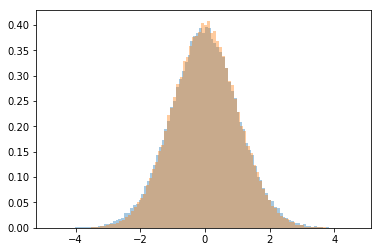

In [122]:
plt.hist(res[1000:], bins=100, density=True, alpha=0.4)
plt.hist(np.random.normal(0,1,100000), bins=100, density=True, alpha=0.4)
plt.show()